In [1]:
import os

files = [f for f in os.listdir('.') if os.path.isfile(f)]
for f in files:
    print(f)

gender_submission.csv
test.csv
Titanic_survivor_analysis.ipynb
train.csv


In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train_df = pd.read_csv('train.csv')

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Does owning a cabin affect survival?? 

In [36]:
train_df['Cabin or not'] = train_df['Cabin'].notnull()
train_df['Cabin or not']

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Cabin or not, Length: 891, dtype: bool

In [37]:
train_df.groupby(['Survived'])['Cabin or not'].value_counts()

Survived  Cabin or not
0         False           481
          True             68
1         False           206
          True            136
Name: Cabin or not, dtype: int64

In [9]:
train_df.groupby(['Survived'])['Pclass'].mean()

Survived
0    2.531876
1    1.950292
Name: Pclass, dtype: float64

### Higher passenger class == higher chance of survival??

In [10]:
train_df.groupby(['Survived'])['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

### Survivors and people who died were nearly of same age, need further analysis on this

In [12]:
train_df.groupby(['Survived'])['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

### Survivors paid a higher ticket price == maybe wealthier people were more likely to survive?

In [14]:
train_df.groupby(['Survived'])['SibSp'].mean()

Survived
0    0.553734
1    0.473684
Name: SibSp, dtype: float64

In [16]:
train_df.groupby(['Survived'])['Parch'].mean()

Survived
0    0.329690
1    0.464912
Name: Parch, dtype: float64

In [17]:
train_df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


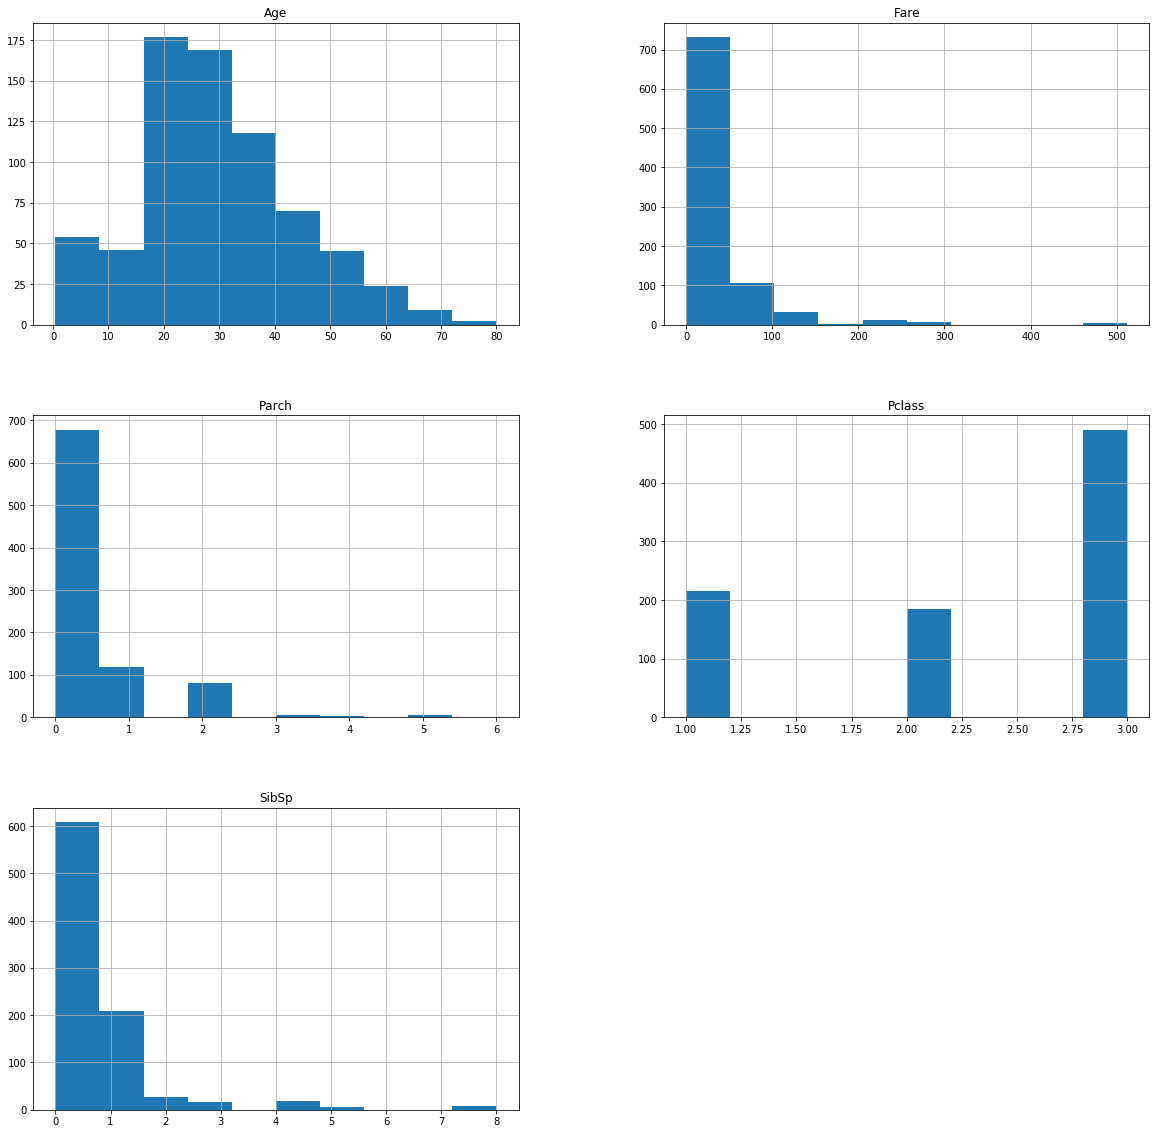

In [24]:
train_df.loc[:,['Age','Fare','Parch','SibSp','Pclass']].hist(figsize=(20,20))
plt.show()

In [ ]:
x = 